## Load data

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import  layers

import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/train_converted.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/test_converted_2.csv')

print(train.shape, test.shape)

(49000, 785) (21000, 784)


## Explore the data

In [3]:
train_images = train.iloc[:,:-1]
train_labels = train.iloc[:,-1]
print(train_images.shape, train_labels.shape)

(49000, 784) (49000,)


In [4]:
train_images = train_images.values
train_images = train_images.reshape(49000, 28, 28)
train_images.shape

(49000, 28, 28)

In [5]:
test_images = test.values
test_images = test_images.reshape(21000, 28, 28)
test_images.shape

(21000, 28, 28)

In [6]:
train_labels = train_labels.values
train_labels

array([4, 9, 1, ..., 9, 3, 0])

## Preprocess the data

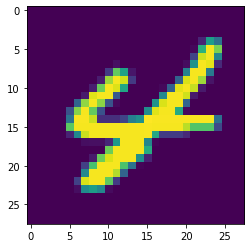

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [8]:
#Scale the values
train_images = train_images / 255.0

test_images = test_images / 255.0

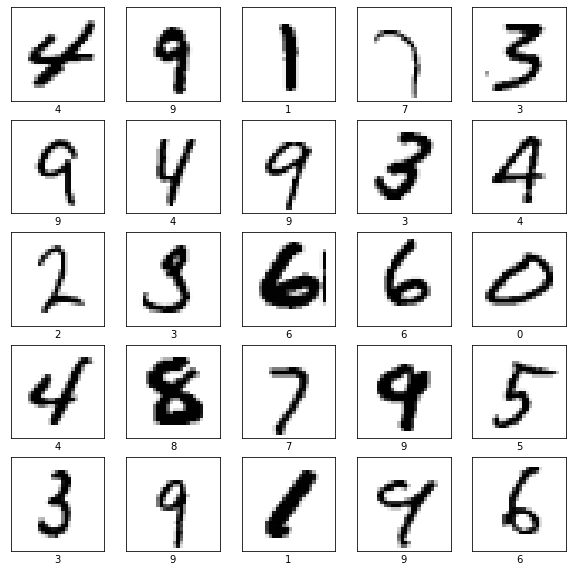

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

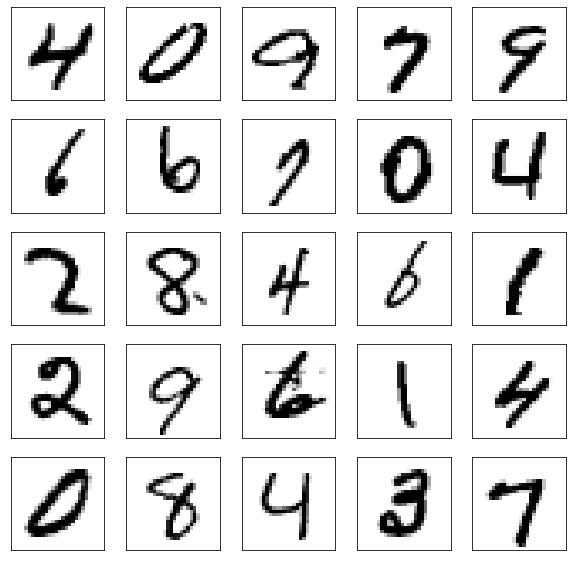

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
plt.show()

## Model 4: CNN

In [ ]:
train_images = train_images.reshape(49000, 28, 28, 1)
test_images = test_images.reshape(21000, 28, 28, 1)

### Setup layers

In [ ]:
model = Sequential([
                    #Conv -> maxpool
                    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
                    layers.MaxPool2D((2,2)),
                    #conv2d -> maxpool
                    layers.Conv2D(32, (5, 5), activation='relu'),
                    layers.MaxPool2D((2,2)),
                    #flatten -> fc -> fc
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(10, activation='softmax')
])

### Compile model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train model

In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=500)

Epoch 1/10
79/79 [==============================] - 28s 357ms/step - loss: 1.8492 - accuracy: 0.6424 - val_loss: 1.6995 - val_accuracy: 0.7621
Epoch 2/10
79/79 [==============================] - 28s 355ms/step - loss: 1.6841 - accuracy: 0.7778 - val_loss: 1.6596 - val_accuracy: 0.8015
Epoch 3/10
79/79 [==============================] - 28s 354ms/step - loss: 1.5694 - accuracy: 0.8959 - val_loss: 1.5092 - val_accuracy: 0.9563
Epoch 4/10
79/79 [==============================] - 32s 410ms/step - loss: 1.4959 - accuracy: 0.9686 - val_loss: 1.4951 - val_accuracy: 0.9682
Epoch 5/10
79/79 [==============================] - 28s 354ms/step - loss: 1.4880 - accuracy: 0.9756 - val_loss: 1.4901 - val_accuracy: 0.9741
Epoch 6/10
79/79 [==============================] - 28s 355ms/step - loss: 1.4834 - accuracy: 0.9797 - val_loss: 1.4843 - val_accuracy: 0.9790
Epoch 7/10
79/79 [==============================] - 28s 357ms/step - loss: 1.4804 - accuracy: 0.9821 - val_loss: 1.4813 - val_accuracy: 0.9821

### Evaluating training accuracy

In [ ]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 14s - loss: 1.4740 - accuracy: 0.9889

Training accuracy: 0.988877534866333


### Making predictions

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([2.69397971e-24, 1.32940865e-20, 4.39364696e-23, 6.45249566e-24,
       1.00000000e+00, 8.40672936e-22, 5.85606030e-19, 4.31318732e-16,
       4.15769849e-14, 1.89440275e-17], dtype=float32)

In [ ]:
np.argmax(predictions[0])

4

In [ ]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

In [ ]:
len(test_labels)

21000

### Verify the predictions

In [ ]:
test_images = test_images.reshape(21000, 28, 28)

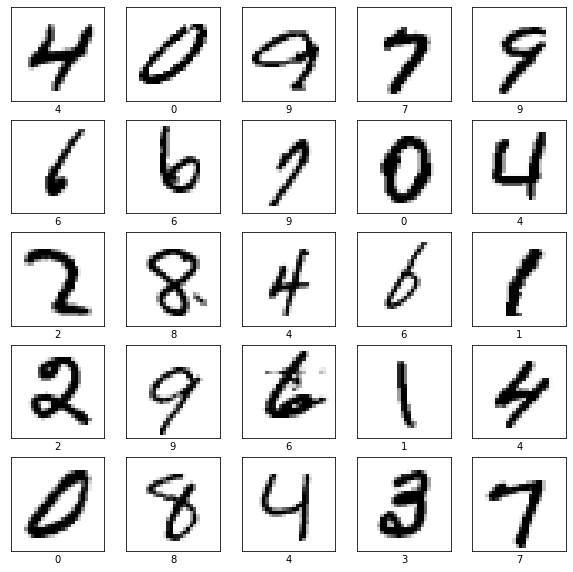

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Export the predictions

In [ ]:
test_file_7 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_7['label'] = test_labels
test_file_7.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [ ]:
test_file_7.to_csv('Test File 7.csv', index=False)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Model 5: CNN with hyperparameters

In [11]:
train_images = train_images.reshape(49000, 28, 28, 1)
test_images = test_images.reshape(21000, 28, 28, 1)

In [12]:
!pip install -q -U keras-tuner

import kerastuner as kt
import IPython

     |████████████████████████████████| 61kB 3.7MB/s 


### Setup layers

In [31]:
def model_builder(hp):
  model = keras.Sequential()

  #filters and kernel size for Conv2D and MaxPool
  hp_filters = hp.Choice('filters', values=[32,64])      #Conv2D no of filters
  hp_kernel_size = hp.Choice('kernel_size', values=[2,3,4]) #Conv2D filter size

  hp_pool_size = hp.Choice('pool_size', values=[2,4])     #Maxpool filter size

  hp_units = hp.Int('units', min_value = 64, max_value = 256, step = 32)         #Dense FC units

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])     #Adam optimizer lr

  #Setting up layers
  #conv2d -> maxpool
  model.add(layers.Conv2D(hp_filters, hp_kernel_size, activation='relu', input_shape=(28, 28, 1), padding='same'))
  model.add(layers.MaxPool2D(hp_pool_size, padding='same'))
  #conv2d ->maxpool
  model.add(layers.Conv2D(hp_filters, hp_kernel_size, activation='relu', padding='same'))
  model.add(layers.MaxPool2D(hp_pool_size, padding='same'))
  #Flatten -> fc -> fc
  model.add(layers.Flatten())
  model.add(layers.Dense(hp_units, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True), 
                metrics = ['accuracy'])
  
  return model

### Compile model

In [32]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3,
                     directory = '/content/drive/My Drive/Colab Notebooks/100daysdl',
                     project_name = 'Day 47 - KT Digit Classification')

INFO:tensorflow:Reloading Oracle from existing project /content/drive/My Drive/Colab Notebooks/100daysdl/Day 47 - KT Digit Classification/oracle.json
INFO:tensorflow:Reloading Tuner from /content/drive/My Drive/Colab Notebooks/100daysdl/Day 47 - KT Digit Classification/tuner0.json


In [33]:
tuner.search(train_images, train_labels, 
             epochs = 10, 
             validation_split = 0.2,
             batch_size = 500)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Epoch 1/2
79/79 [==============================] - 30s 377ms/step - loss: 2.3535 - accuracy: 0.1058 - val_loss: 2.3581 - val_accuracy: 0.1031
Epoch 2/2
79/79 [==============================] - 30s 379ms/step - loss: 2.3567 - accuracy: 0.1045 - val_loss: 2.3581 - val_accuracy: 0.1031


Epoch 1/2
79/79 [==============================] - 28s 350ms/step - loss: 1.9623 - accuracy: 0.4953 - val_loss: 1.7126 - val_accuracy: 0.7477
Epoch 2/2
79/79 [==============================] - 27s 348ms/step - loss: 1.6851 - accuracy: 0.7751 - val_loss: 1.6752 - val_accuracy: 0.7845


Epoch 1/2
79/79 [==============================] - 31s 388ms/step - loss: 1.8379 - accuracy: 0.6789 - val_loss: 1.5729 - val_accuracy: 0.9042
Epoch 2/2
79/79 [==============================] - 30s 384ms/step - loss: 1.5404 - accuracy: 0.9312 - val_loss: 1.5240 - val_accuracy: 0.9466


Epoch 1/2
79/79 [==============================] - 63s 801ms/step - loss: 1.7859 - accuracy: 0.6717 - val_loss: 1.6971 - val_accuracy: 0.7626
Epoch 2/2
79/79 [==============================] - 64s 806ms/step - loss: 1.6800 - accuracy: 0.7798 - val_loss: 1.6893 - val_accuracy: 0.7705


Epoch 1/2
79/79 [==============================] - 41s 523ms/step - loss: 1.7666 - accuracy: 0.6945 - val_loss: 1.6687 - val_accuracy: 0.7907
Epoch 2/2
79/79 [==============================] - 41s 525ms/step - loss: 1.6663 - accuracy: 0.7928 - val_loss: 1.6605 - val_accuracy: 0.7989


Epoch 1/2
79/79 [==============================] - 94s 1s/step - loss: 2.1144 - accuracy: 0.4570 - val_loss: 1.8411 - val_accuracy: 0.6469
Epoch 2/2
79/79 [==============================] - 95s 1s/step - loss: 1.7686 - accuracy: 0.7140 - val_loss: 1.7285 - val_accuracy: 0.7469


Epoch 1/2
79/79 [==============================] - 30s 374ms/step - loss: 2.0034 - accuracy: 0.4989 - val_loss: 1.8712 - val_accuracy: 0.5881
Epoch 2/2
79/79 [==============================] - 30s 375ms/step - loss: 1.8573 - accuracy: 0.6003 - val_loss: 1.8606 - val_accuracy: 0.5969


Epoch 1/2
79/79 [==============================] - 141s 2s/step - loss: 1.7622 - accuracy: 0.7100 - val_loss: 1.6198 - val_accuracy: 0.8420
Epoch 2/2
79/79 [==============================] - 141s 2s/step - loss: 1.5908 - accuracy: 0.8716 - val_loss: 1.5795 - val_accuracy: 0.8808


Epoch 1/2
79/79 [==============================] - 30s 385ms/step - loss: 1.8205 - accuracy: 0.6445 - val_loss: 1.6819 - val_accuracy: 0.7784
Epoch 2/2
79/79 [==============================] - 30s 385ms/step - loss: 1.6692 - accuracy: 0.7908 - val_loss: 1.6762 - val_accuracy: 0.7834


Epoch 1/2
79/79 [==============================] - 18s 227ms/step - loss: 2.2959 - accuracy: 0.1511 - val_loss: 2.2836 - val_accuracy: 0.3312
Epoch 2/2
79/79 [==============================] - 18s 227ms/step - loss: 2.2306 - accuracy: 0.3320 - val_loss: 2.1441 - val_accuracy: 0.4360


Epoch 1/2
79/79 [==============================] - 20s 253ms/step - loss: 2.2878 - accuracy: 0.2696 - val_loss: 2.2528 - val_accuracy: 0.3167
Epoch 2/2
79/79 [==============================] - 20s 253ms/step - loss: 2.1333 - accuracy: 0.4513 - val_loss: 1.9780 - val_accuracy: 0.6248


Epoch 3/4
79/79 [==============================] - 30s 382ms/step - loss: 1.8831 - accuracy: 0.6147 - val_loss: 1.6410 - val_accuracy: 0.8338
Epoch 4/4
79/79 [==============================] - 30s 382ms/step - loss: 1.5604 - accuracy: 0.9137 - val_loss: 1.5252 - val_accuracy: 0.9449


Epoch 3/4
79/79 [==============================] - 141s 2s/step - loss: 1.6587 - accuracy: 0.8135 - val_loss: 1.5223 - val_accuracy: 0.9411
Epoch 4/4
79/79 [==============================] - 141s 2s/step - loss: 1.5015 - accuracy: 0.9620 - val_loss: 1.4924 - val_accuracy: 0.9711


Epoch 3/4
79/79 [==============================] - 41s 519ms/step - loss: 1.9242 - accuracy: 0.5335 - val_loss: 1.8595 - val_accuracy: 0.5986
Epoch 4/4
79/79 [==============================] - 41s 518ms/step - loss: 1.8310 - accuracy: 0.6250 - val_loss: 1.7671 - val_accuracy: 0.6910


Epoch 3/4
79/79 [==============================] - 27s 345ms/step - loss: 1.9435 - accuracy: 0.5170 - val_loss: 1.8611 - val_accuracy: 0.5957
Epoch 4/4
79/79 [==============================] - 27s 342ms/step - loss: 1.8253 - accuracy: 0.6300 - val_loss: 1.6101 - val_accuracy: 0.8520


Epoch 5/10
79/79 [==============================] - 141s 2s/step - loss: 1.7437 - accuracy: 0.7210 - val_loss: 1.5969 - val_accuracy: 0.8656
Epoch 6/10
79/79 [==============================] - 141s 2s/step - loss: 1.5869 - accuracy: 0.8753 - val_loss: 1.5770 - val_accuracy: 0.8839
Epoch 7/10
79/79 [==============================] - 141s 2s/step - loss: 1.5056 - accuracy: 0.9577 - val_loss: 1.4866 - val_accuracy: 0.9761
Epoch 8/10
79/79 [==============================] - 140s 2s/step - loss: 1.4817 - accuracy: 0.9807 - val_loss: 1.4815 - val_accuracy: 0.9810
Epoch 9/10
79/79 [==============================] - 141s 2s/step - loss: 1.4772 - accuracy: 0.9852 - val_loss: 1.4789 - val_accuracy: 0.9830
Epoch 10/10
79/79 [==============================] - 141s 2s/step - loss: 1.4751 - accuracy: 0.9873 - val_loss: 1.4765 - val_accuracy: 0.9855


Epoch 5/10
79/79 [==============================] - 30s 382ms/step - loss: 1.8801 - accuracy: 0.6113 - val_loss: 1.6450 - val_accuracy: 0.8281
Epoch 6/10
79/79 [==============================] - 30s 381ms/step - loss: 1.6174 - accuracy: 0.8495 - val_loss: 1.6091 - val_accuracy: 0.8564
Epoch 7/10
79/79 [==============================] - 30s 382ms/step - loss: 1.5973 - accuracy: 0.8663 - val_loss: 1.5940 - val_accuracy: 0.8702
Epoch 8/10
79/79 [==============================] - 30s 381ms/step - loss: 1.5892 - accuracy: 0.8737 - val_loss: 1.5887 - val_accuracy: 0.8743
Epoch 9/10
79/79 [==============================] - 30s 384ms/step - loss: 1.5843 - accuracy: 0.8777 - val_loss: 1.5874 - val_accuracy: 0.8749
Epoch 10/10
79/79 [==============================] - 30s 381ms/step - loss: 1.5816 - accuracy: 0.8802 - val_loss: 1.5883 - val_accuracy: 0.8731


Epoch 1/4
79/79 [==============================] - 22s 282ms/step - loss: 1.8186 - accuracy: 0.6418 - val_loss: 1.7062 - val_accuracy: 0.7547
Epoch 2/4
79/79 [==============================] - 22s 281ms/step - loss: 1.6823 - accuracy: 0.7769 - val_loss: 1.6870 - val_accuracy: 0.7717
Epoch 3/4
79/79 [==============================] - 22s 280ms/step - loss: 1.6735 - accuracy: 0.7848 - val_loss: 1.6730 - val_accuracy: 0.7849
Epoch 4/4
79/79 [==============================] - 22s 281ms/step - loss: 1.5635 - accuracy: 0.8975 - val_loss: 1.4847 - val_accuracy: 0.9768


Epoch 1/4
79/79 [==============================] - 57s 722ms/step - loss: 1.8522 - accuracy: 0.6341 - val_loss: 1.6970 - val_accuracy: 0.7671
Epoch 2/4
79/79 [==============================] - 57s 721ms/step - loss: 1.6853 - accuracy: 0.7760 - val_loss: 1.6775 - val_accuracy: 0.7837
Epoch 3/4
79/79 [==============================] - 57s 723ms/step - loss: 1.6710 - accuracy: 0.7898 - val_loss: 1.6415 - val_accuracy: 0.8215
Epoch 4/4
79/79 [==============================] - 57s 719ms/step - loss: 1.5864 - accuracy: 0.8768 - val_loss: 1.5854 - val_accuracy: 0.8769


Epoch 1/4
79/79 [==============================] - 27s 348ms/step - loss: 2.2843 - accuracy: 0.2737 - val_loss: 2.2382 - val_accuracy: 0.3183
Epoch 2/4
79/79 [==============================] - 28s 348ms/step - loss: 2.0852 - accuracy: 0.5010 - val_loss: 1.9203 - val_accuracy: 0.6237
Epoch 3/4
79/79 [==============================] - 28s 349ms/step - loss: 1.8463 - accuracy: 0.6742 - val_loss: 1.7960 - val_accuracy: 0.7067
Epoch 4/4
79/79 [==============================] - 28s 349ms/step - loss: 1.7650 - accuracy: 0.7317 - val_loss: 1.7537 - val_accuracy: 0.7306


Epoch 1/4
79/79 [==============================] - 30s 382ms/step - loss: 1.9552 - accuracy: 0.4996 - val_loss: 1.8591 - val_accuracy: 0.5962
Epoch 2/4
79/79 [==============================] - 30s 383ms/step - loss: 1.7076 - accuracy: 0.7509 - val_loss: 1.6015 - val_accuracy: 0.8591
Epoch 3/4
79/79 [==============================] - 30s 382ms/step - loss: 1.5239 - accuracy: 0.9371 - val_loss: 1.4862 - val_accuracy: 0.9756
Epoch 4/4
79/79 [==============================] - 30s 381ms/step - loss: 1.4842 - accuracy: 0.9769 - val_loss: 1.4865 - val_accuracy: 0.9756


Epoch 1/4
79/79 [==============================] - 40s 507ms/step - loss: 2.3598 - accuracy: 0.1007 - val_loss: 2.3597 - val_accuracy: 0.1014
Epoch 2/4
79/79 [==============================] - 40s 505ms/step - loss: 2.3632 - accuracy: 0.0979 - val_loss: 2.3597 - val_accuracy: 0.1014
Epoch 3/4
79/79 [==============================] - 40s 505ms/step - loss: 2.3632 - accuracy: 0.0979 - val_loss: 2.3597 - val_accuracy: 0.1014
Epoch 4/4
79/79 [==============================] - 40s 506ms/step - loss: 2.3632 - accuracy: 0.0979 - val_loss: 2.3597 - val_accuracy: 0.1014


Epoch 1/4
79/79 [==============================] - 61s 778ms/step - loss: 1.9300 - accuracy: 0.5271 - val_loss: 1.7577 - val_accuracy: 0.7018
Epoch 2/4
79/79 [==============================] - 62s 782ms/step - loss: 1.6873 - accuracy: 0.7721 - val_loss: 1.6810 - val_accuracy: 0.7774
Epoch 3/4
79/79 [==============================] - 61s 775ms/step - loss: 1.6271 - accuracy: 0.8324 - val_loss: 1.5867 - val_accuracy: 0.8728
Epoch 4/4
79/79 [==============================] - 61s 774ms/step - loss: 1.5746 - accuracy: 0.8846 - val_loss: 1.5805 - val_accuracy: 0.8779


Epoch 5/10
79/79 [==============================] - 22s 283ms/step - loss: 1.8617 - accuracy: 0.5977 - val_loss: 1.7756 - val_accuracy: 0.6824
Epoch 6/10
79/79 [==============================] - 22s 284ms/step - loss: 1.6393 - accuracy: 0.8219 - val_loss: 1.6039 - val_accuracy: 0.8569
Epoch 7/10
79/79 [==============================] - 22s 284ms/step - loss: 1.5919 - accuracy: 0.8685 - val_loss: 1.5931 - val_accuracy: 0.8673
Epoch 8/10
79/79 [==============================] - 22s 283ms/step - loss: 1.5833 - accuracy: 0.8772 - val_loss: 1.5838 - val_accuracy: 0.8765
Epoch 9/10
79/79 [==============================] - 22s 282ms/step - loss: 1.5796 - accuracy: 0.8803 - val_loss: 1.5839 - val_accuracy: 0.8760
Epoch 10/10
79/79 [==============================] - 22s 282ms/step - loss: 1.5772 - accuracy: 0.8828 - val_loss: 1.5805 - val_accuracy: 0.8796


Epoch 5/10
79/79 [==============================] - 30s 384ms/step - loss: 1.9690 - accuracy: 0.4882 - val_loss: 1.6008 - val_accuracy: 0.8598
Epoch 6/10
79/79 [==============================] - 30s 382ms/step - loss: 1.5896 - accuracy: 0.8707 - val_loss: 1.5836 - val_accuracy: 0.8772
Epoch 7/10
79/79 [==============================] - 30s 384ms/step - loss: 1.5779 - accuracy: 0.8824 - val_loss: 1.5741 - val_accuracy: 0.8864
Epoch 8/10
79/79 [==============================] - 30s 381ms/step - loss: 1.5721 - accuracy: 0.8883 - val_loss: 1.5716 - val_accuracy: 0.8883
Epoch 9/10
79/79 [==============================] - 30s 381ms/step - loss: 1.5710 - accuracy: 0.8895 - val_loss: 1.5705 - val_accuracy: 0.8896
Epoch 10/10
79/79 [==============================] - 30s 381ms/step - loss: 1.5693 - accuracy: 0.8906 - val_loss: 1.5702 - val_accuracy: 0.8903


Epoch 1/10
79/79 [==============================] - 22s 284ms/step - loss: 2.0151 - accuracy: 0.4888 - val_loss: 1.8009 - val_accuracy: 0.6656
Epoch 2/10
79/79 [==============================] - 22s 283ms/step - loss: 1.7852 - accuracy: 0.6785 - val_loss: 1.7796 - val_accuracy: 0.6811
Epoch 3/10
79/79 [==============================] - 22s 283ms/step - loss: 1.7717 - accuracy: 0.6894 - val_loss: 1.7717 - val_accuracy: 0.6900
Epoch 4/10
79/79 [==============================] - 22s 283ms/step - loss: 1.7657 - accuracy: 0.6940 - val_loss: 1.7653 - val_accuracy: 0.6938
Epoch 5/10
79/79 [==============================] - 22s 282ms/step - loss: 1.7622 - accuracy: 0.6965 - val_loss: 1.7625 - val_accuracy: 0.6957
Epoch 6/10
79/79 [==============================] - 22s 285ms/step - loss: 1.7590 - accuracy: 0.6996 - val_loss: 1.7612 - val_accuracy: 0.6974
Epoch 7/10
79/79 [==============================] - 22s 282ms/step - loss: 1.7570 - accuracy: 0.7008 - val_loss: 1.7599 - val_accuracy: 0.6989

Epoch 1/10
79/79 [==============================] - 40s 502ms/step - loss: 1.7431 - accuracy: 0.7185 - val_loss: 1.5873 - val_accuracy: 0.8733
Epoch 2/10
79/79 [==============================] - 44s 552ms/step - loss: 1.5860 - accuracy: 0.8749 - val_loss: 1.5830 - val_accuracy: 0.8770
Epoch 3/10
79/79 [==============================] - 39s 500ms/step - loss: 1.5774 - accuracy: 0.8828 - val_loss: 1.5752 - val_accuracy: 0.8853
Epoch 4/10
79/79 [==============================] - 39s 499ms/step - loss: 1.5726 - accuracy: 0.8870 - val_loss: 1.5765 - val_accuracy: 0.8830
Epoch 5/10
79/79 [==============================] - 39s 497ms/step - loss: 1.5708 - accuracy: 0.8888 - val_loss: 1.5730 - val_accuracy: 0.8863
Epoch 6/10
79/79 [==============================] - 39s 500ms/step - loss: 1.5692 - accuracy: 0.8903 - val_loss: 1.5862 - val_accuracy: 0.8739
Epoch 7/10
79/79 [==============================] - 39s 497ms/step - loss: 1.5701 - accuracy: 0.8893 - val_loss: 1.5746 - val_accuracy: 0.8856

Epoch 1/10
79/79 [==============================] - 41s 519ms/step - loss: 1.9215 - accuracy: 0.5361 - val_loss: 1.8537 - val_accuracy: 0.6014
Epoch 2/10
79/79 [==============================] - 41s 519ms/step - loss: 1.8162 - accuracy: 0.6384 - val_loss: 1.7643 - val_accuracy: 0.6912
Epoch 3/10
79/79 [==============================] - 41s 518ms/step - loss: 1.7308 - accuracy: 0.7256 - val_loss: 1.6772 - val_accuracy: 0.7809
Epoch 4/10
79/79 [==============================] - 41s 519ms/step - loss: 1.5989 - accuracy: 0.8610 - val_loss: 1.5953 - val_accuracy: 0.8643
Epoch 5/10
79/79 [==============================] - 41s 518ms/step - loss: 1.5759 - accuracy: 0.8839 - val_loss: 1.5858 - val_accuracy: 0.8744
Epoch 6/10
79/79 [==============================] - 41s 516ms/step - loss: 1.5690 - accuracy: 0.8893 - val_loss: 1.5768 - val_accuracy: 0.8807
Epoch 7/10
79/79 [==============================] - 45s 564ms/step - loss: 1.4885 - accuracy: 0.9725 - val_loss: 1.4806 - val_accuracy: 0.9807

Epoch 1/10
79/79 [==============================] - 62s 783ms/step - loss: 1.7855 - accuracy: 0.7176 - val_loss: 1.5433 - val_accuracy: 0.9297
Epoch 2/10
79/79 [==============================] - 62s 784ms/step - loss: 1.5214 - accuracy: 0.9494 - val_loss: 1.5114 - val_accuracy: 0.9562
Epoch 3/10
79/79 [==============================] - 62s 780ms/step - loss: 1.5008 - accuracy: 0.9660 - val_loss: 1.4952 - val_accuracy: 0.9710
Epoch 4/10
79/79 [==============================] - 62s 780ms/step - loss: 1.4905 - accuracy: 0.9746 - val_loss: 1.4930 - val_accuracy: 0.9719
Epoch 5/10
79/79 [==============================] - 62s 784ms/step - loss: 1.4874 - accuracy: 0.9771 - val_loss: 1.4883 - val_accuracy: 0.9761
Epoch 6/10
79/79 [==============================] - 62s 783ms/step - loss: 1.4828 - accuracy: 0.9807 - val_loss: 1.4855 - val_accuracy: 0.9781
Epoch 7/10
79/79 [==============================] - 62s 784ms/step - loss: 1.4799 - accuracy: 0.9837 - val_loss: 1.4863 - val_accuracy: 0.9761

INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 256 and the optimal learning rate for the optimizer
is 0.001.



### Train model

In [34]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels, epochs = 10, validation_split = 0.2, batch_size = 500)

Epoch 1/10
79/79 [==============================] - 141s 2s/step - loss: 1.6892 - accuracy: 0.7878 - val_loss: 1.5165 - val_accuracy: 0.9491
Epoch 2/10
79/79 [==============================] - 140s 2s/step - loss: 1.4993 - accuracy: 0.9646 - val_loss: 1.4940 - val_accuracy: 0.9700
Epoch 3/10
79/79 [==============================] - 141s 2s/step - loss: 1.4873 - accuracy: 0.9754 - val_loss: 1.4888 - val_accuracy: 0.9737
Epoch 4/10
79/79 [==============================] - 147s 2s/step - loss: 1.4821 - accuracy: 0.9804 - val_loss: 1.4817 - val_accuracy: 0.9800
Epoch 5/10
79/79 [==============================] - 143s 2s/step - loss: 1.4777 - accuracy: 0.9847 - val_loss: 1.4801 - val_accuracy: 0.9817
Epoch 6/10
79/79 [==============================] - 143s 2s/step - loss: 1.4755 - accuracy: 0.9867 - val_loss: 1.4803 - val_accuracy: 0.9811
Epoch 7/10
79/79 [==============================] - 143s 2s/step - loss: 1.4735 - accuracy: 0.9884 - val_loss: 1.4777 - val_accuracy: 0.9844
Epoch 8/10
79

### Evaluating training accuracy

In [35]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

print('\nTraining accuracy:', train_acc)

1532/1532 - 45s - loss: 1.4694 - accuracy: 0.9923

Training accuracy: 0.9922857284545898


### Making predictions

In [36]:
predictions = model.predict(test_images)

In [37]:
np.argmax(predictions[0])

4

In [39]:
test_labels = []
for i in range(len(predictions)):
  test_labels.append(np.argmax(predictions[i]))

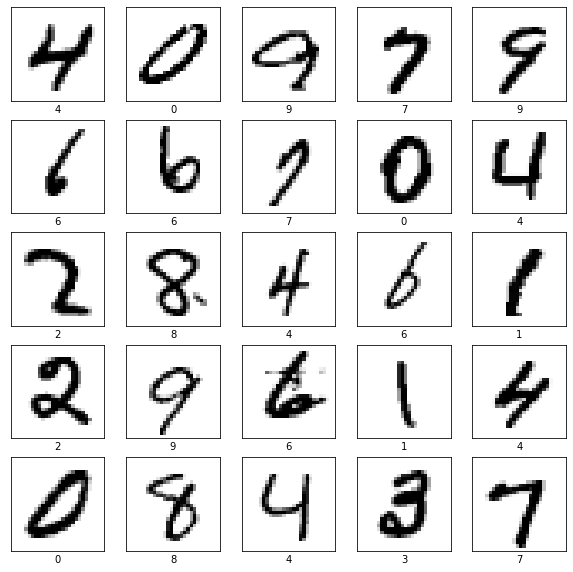

In [45]:
test_images = test_images.reshape(21000, 28, 28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
plt.show()

### Verify the predictions

In [42]:
test_file_6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Analytics Vidhya/digit recognizer/Test.csv')
test_file_6['label'] = test_labels
test_file_6.head()

,filename,label
0,49000.png,4
1,49001.png,0
2,49002.png,9
3,49003.png,7
4,49004.png,9


In [43]:
test_file_6.to_csv('Test File 8.csv', index=False)

In [44]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2